In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("Coffee Shop Sales.csv")
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,1/1/2023,7:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,1/1/2023,7:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,1/1/2023,7:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,1/1/2023,7:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,1/1/2023,7:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [4]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000



Numerical columns for boxplot analysis: ['transaction_id', 'transaction_qty', 'store_id', 'product_id', 'unit_price']


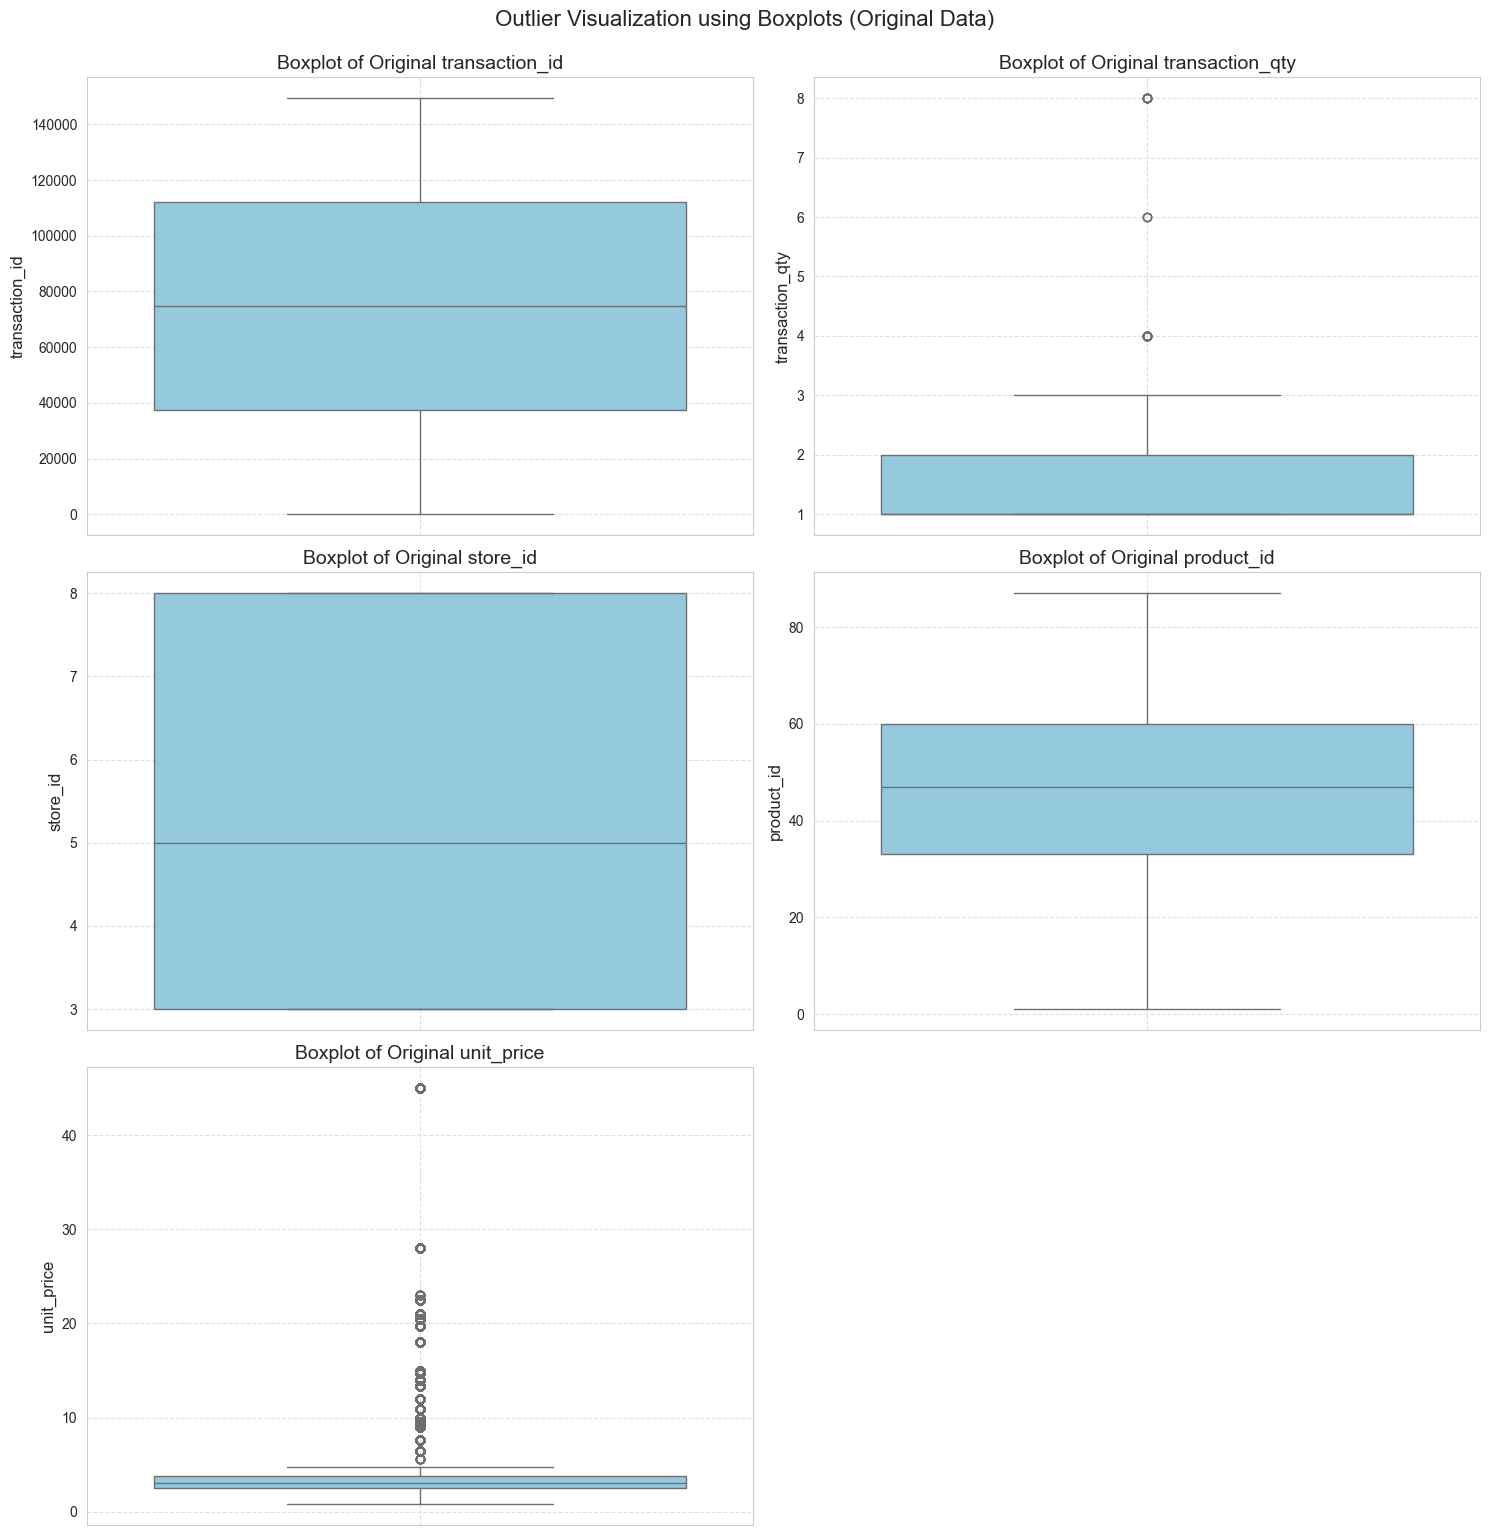

In [5]:
# Identify numerical columns for box plotting
# We will exclude columns that are likely identifiers or categorical but appear numerical (e.g., 'Order ID' if present)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Filter out potentially non-relevant numerical columns like 'Order ID' if they exist and are not truly quantitative measures
# You might need to adjust this list based on the actual columns in your CSV
exclude_cols = ['Order ID', 'Transaction ID'] # Add any other columns you want to exclude
numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

if not numerical_cols:
    print("\nNo suitable numerical columns found for boxplots after exclusion. Please check your data.")
else:
    print(f"\nNumerical columns for boxplot analysis: {numerical_cols}")

    # Set up the matplotlib figure and axes for original data
    n_cols = len(numerical_cols)
    if n_cols > 0:
        n_rows = (n_cols + 1) // 2 # Arrange in 2 columns
        fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
        axes = axes.flatten() # Flatten the array of axes for easy iteration

        # Create a boxplot for each numerical column (original data)
        for i, col in enumerate(numerical_cols):
            sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
            axes[i].set_title(f'Boxplot of Original {col}', fontsize=14)
            axes[i].set_ylabel(col, fontsize=12)
            axes[i].grid(True, linestyle='--', alpha=0.6)

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.suptitle('Outlier Visualization using Boxplots (Original Data)', y=1.02, fontsize=16)
        plt.show()
    else:
        print("\nNo numerical columns available for plotting.")



--- Fixing Outliers using Capping (Winsorization) ---
Outliers in 'transaction_id' have been capped between -74802.00 and 224232.00
Outliers in 'transaction_qty' have been capped between -0.50 and 3.50
Outliers in 'store_id' have been capped between -4.50 and 15.50
Outliers in 'product_id' have been capped between -7.50 and 100.50
Outliers in 'unit_price' have been capped between 0.62 and 5.62

Numerical columns for boxplot analysis after fixing: ['transaction_id', 'transaction_qty', 'store_id', 'product_id', 'unit_price']


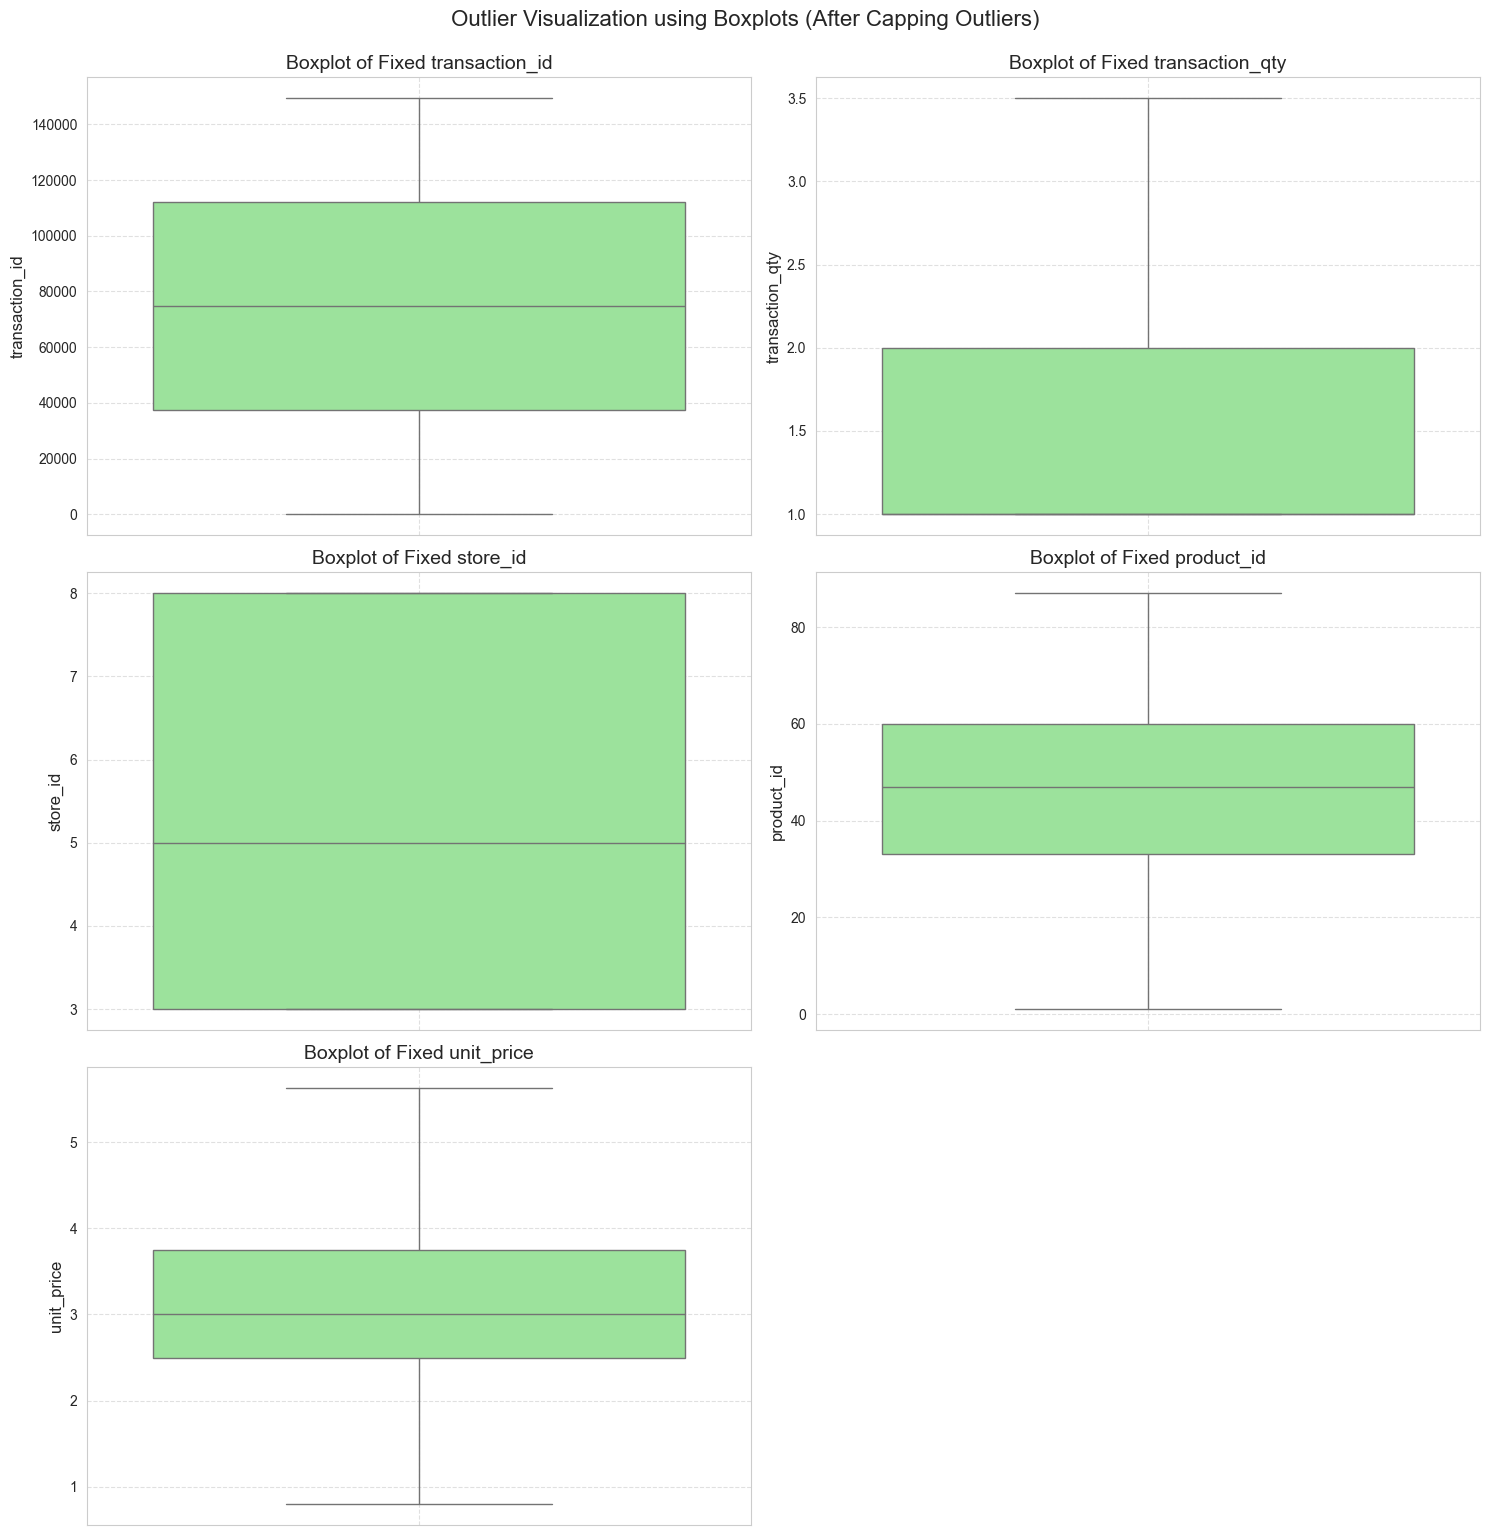

In [6]:
# --- New section: Outlier Fixing using Capping (Winsorization) ---
print("\n--- Fixing Outliers using Capping (Winsorization) ---")
df1 = df.copy() # Create a copy to store the fixed data

for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df1[col] = df1[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outliers in '{col}' have been capped between {lower_bound:.2f} and {upper_bound:.2f}")

# Visualize data after outlier fixing
if numerical_cols:
    print(f"\nNumerical columns for boxplot analysis after fixing: {numerical_cols}")

    # Set up the matplotlib figure and axes for fixed data
    n_cols = len(numerical_cols)
    if n_cols > 0:
        n_rows = (n_cols + 1) // 2
        fig_fixed, axes_fixed = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
        axes_fixed = axes_fixed.flatten()

        # Create a boxplot for each numerical column (fixed data)
        for i, col in enumerate(numerical_cols):
            sns.boxplot(y=df1[col], ax=axes_fixed[i], color='lightgreen')
            axes_fixed[i].set_title(f'Boxplot of Fixed {col}', fontsize=14)
            axes_fixed[i].set_ylabel(col, fontsize=12)
            axes_fixed[i].grid(True, linestyle='--', alpha=0.6)

        # Hide any unused subplots
        for j in range(i + 1, len(axes_fixed)):
            fig_fixed.delaxes(axes_fixed[j])

        plt.tight_layout()
        plt.suptitle('Outlier Visualization using Boxplots (After Capping Outliers)', y=1.02, fontsize=16)
        plt.show()
    else:
        print("\nNo numerical columns available for plotting after fixing.")

In [7]:
# Convert date and time columns
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'], errors='coerce')  # Convert to datetime
# Clean time format to HH:MM:SS as string
df1['transaction_time'] = pd.to_datetime(df1['transaction_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')
 # Time only

# Convert object columns with categories
categorical_cols = ['store_location', 'product_category', 'product_type', 'product_detail']
for col in categorical_cols:
    df1[col] = df1[col].astype('category')

# Optional: If you want 'product_detail' to remain as string instead of category:
# df_fixed['product_detail'] = df_fixed['product_detail'].astype(str)

# View dtypes to confirm
print(df1.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty            float64
store_id                     int64
store_location            category
product_id                   int64
unit_price                 float64
product_category          category
product_type              category
product_detail            category
dtype: object


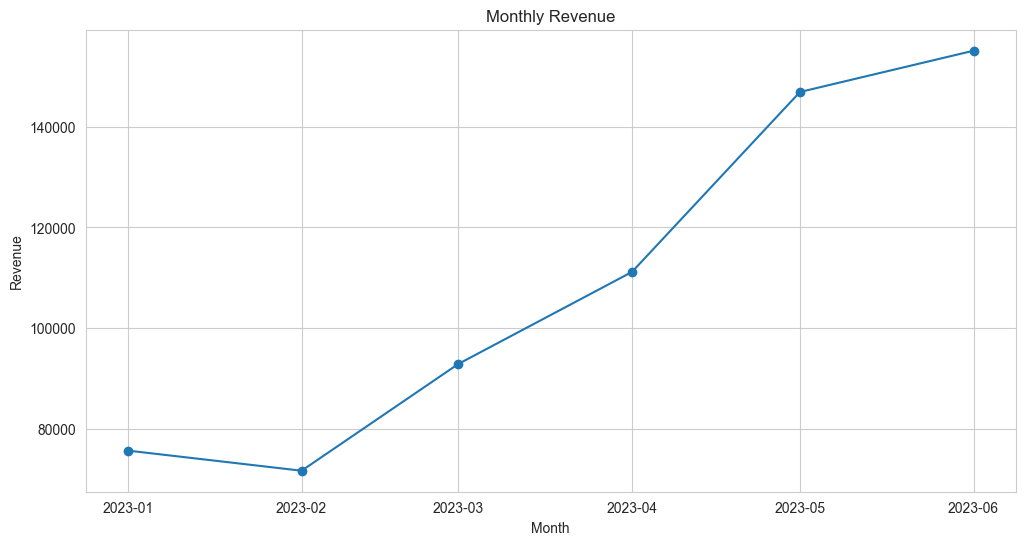

In [8]:
# Feature Engineering
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'])
df1['revenue'] = df1['transaction_qty'] * df1['unit_price']
df1['year_month'] = df1['transaction_date'].dt.to_period('M').dt.to_timestamp()

# Aggregate monthly features
monthly_df = df1.groupby('year_month').agg(
    revenue=('revenue', 'sum'),
    total_transactions=('transaction_id', 'count'),
    avg_unit_price=('unit_price', 'mean'),
    avg_qty_per_txn=('transaction_qty', 'mean'),
    unique_products=('product_id', 'nunique')
).reset_index()

# Add time index
monthly_df['month_number'] = range(1, len(monthly_df) + 1)

plt.figure(figsize=(12,6))
plt.plot(monthly_df['year_month'], monthly_df['revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression

# Features and target
features = ['month_number', 'total_transactions', 'avg_unit_price', 'avg_qty_per_txn', 'unique_products']
X = monthly_df[features]
y = monthly_df['revenue']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coeff_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Top 3 features by contribution (magnitude of coefficient)
top3 = coeff_df.head(3)

print(top3)


           Feature   Coefficient
3  avg_qty_per_txn  50650.701701
2   avg_unit_price  24350.834495
0     month_number     61.727404


Linear Regression Feature Importance (Absolute Coefficient Magnitude):
              Feature   Coefficient
3     avg_qty_per_txn  50650.701701
2      avg_unit_price  24350.834495
0        month_number     61.727404
1  total_transactions      4.374783
4     unique_products      0.000000


/var/folders/7m/tj628p4932dbkrpjt4zx56wc0000gn/T/ipykernel_65540/1967961622.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x='Feature', y='Coefficient', palette='viridis')


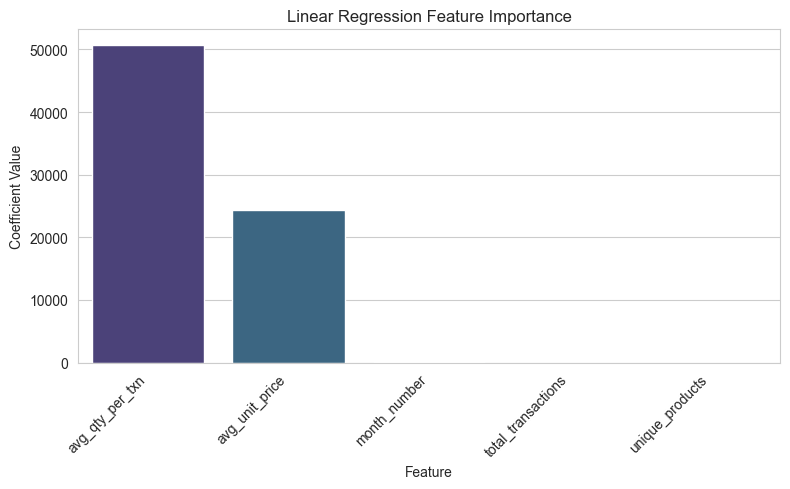

In [18]:
# Feature Importance for Linear Regression (magnitude of coefficients)
# The magnitude of the coefficients represents the importance in linear regression

print("Linear Regression Feature Importance (Absolute Coefficient Magnitude):")
print(coeff_df.sort_values(by='Coefficient', key=abs, ascending=False))

plt.figure(figsize=(8, 5))
sns.barplot(data=coeff_df, x='Feature', y='Coefficient', palette='viridis')
plt.title('Linear Regression Feature Importance')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

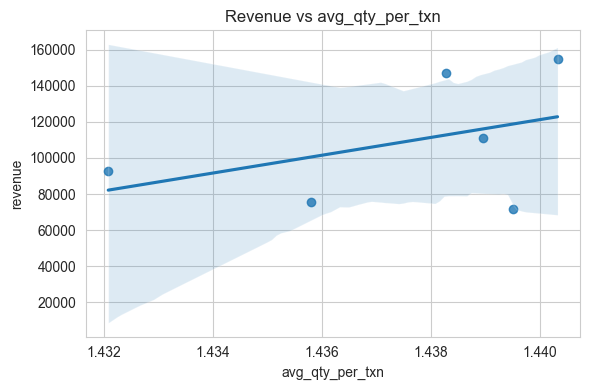

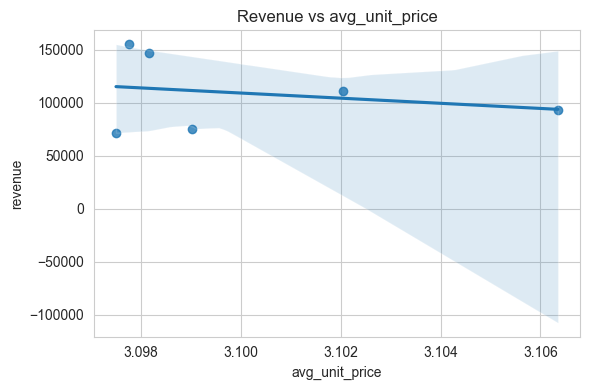

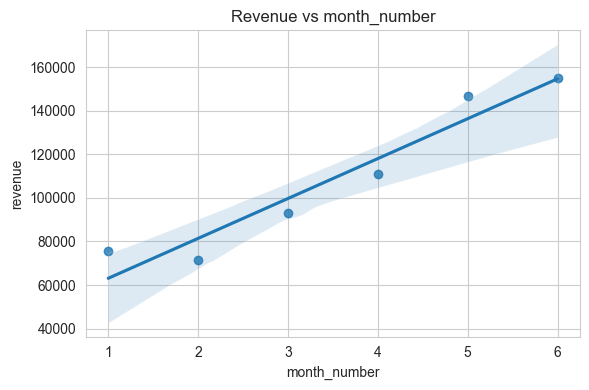

In [10]:
# Plot linearity of top 3 features
for feature in top3['Feature']:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=monthly_df, x=feature, y='revenue')
    plt.title(f'Revenue vs {feature}')
    plt.tight_layout()
    plt.grid(True)
    plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Load and preprocess ---
# Using df1 which has outliers capped
df_processed = df1.copy()

# Convert date column (already done in previous cell, but keeping for completeness)
df_processed['transaction_date'] = pd.to_datetime(df_processed['transaction_date'])

# Create revenue and group by month
df_processed['revenue'] = df_processed['transaction_qty'] * df_processed['unit_price']
df_processed['year_month'] = df_processed['transaction_date'].dt.to_period('M').dt.to_timestamp()

monthly_df_linear = df_processed.groupby('year_month').agg(
    revenue=('revenue', 'sum')
).reset_index()

# Add month index
monthly_df_linear['month_number'] = range(1, len(monthly_df_linear) + 1)

# --- Linear regression on just 'month_number' ---
X_linear = monthly_df_linear[['month_number']]
y_linear = monthly_df_linear['revenue']

model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)
y_pred_linear = model_linear.predict(X_linear)

# --- Metrics ---
mse_linear = mean_squared_error(y_linear, y_pred_linear)
mae_linear = mean_absolute_error(y_linear, y_pred_linear)
r2_linear = r2_score(y_linear, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print(f"Linear Regression (Fixed Data) Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Linear Regression (Fixed Data) Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"Linear Regression (Fixed Data) R² Score: {r2_linear*100:.3f}")
print(f"Linear Regression (Fixed Data) Rmse Score: {rmse_linear:.3f}")



Linear Regression (Fixed Data) Mean Squared Error (MSE): 76379350.06
Linear Regression (Fixed Data) Mean Absolute Error (MAE): 7831.89
Linear Regression (Fixed Data) R² Score: 92.760
Linear Regression (Fixed Data) Rmse Score: 8739.528


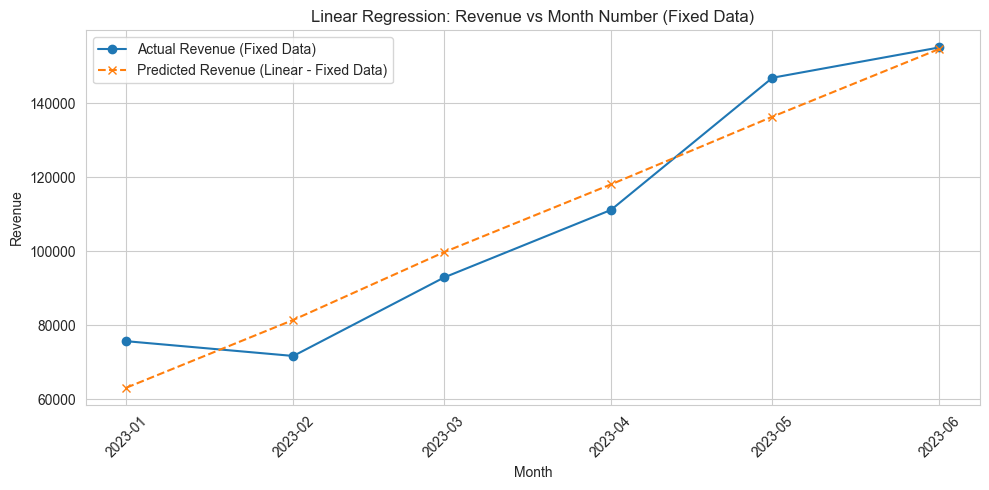

In [12]:

# --- Visualization ---
plt.figure(figsize=(10, 5))
plt.plot(monthly_df_linear['year_month'], y_linear, label='Actual Revenue (Fixed Data)', marker='o')
plt.plot(monthly_df_linear['year_month'], y_pred_linear, label='Predicted Revenue (Linear - Fixed Data)', linestyle='--', marker='x')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Linear Regression: Revenue vs Month Number (Fixed Data)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# --- Prepare monthly DataFrame (with all needed columns) ---
df_processed_rf = df1.copy()
df_processed_rf['transaction_date'] = pd.to_datetime(df_processed_rf['transaction_date'])
df_processed_rf['revenue'] = df_processed_rf['transaction_qty'] * df_processed_rf['unit_price']
df_processed_rf['year_month'] = df_processed_rf['transaction_date'].dt.to_period('M').dt.to_timestamp()

monthly_df_rf = df_processed_rf.groupby('year_month').agg(
    revenue=('revenue', 'sum'),
    total_transactions=('transaction_id', 'count'),
    avg_unit_price=('unit_price', 'mean'),
    avg_qty_per_txn=('transaction_qty', 'mean'),
    unique_products=('product_id', 'nunique')
).reset_index()

monthly_df_rf['month_number'] = range(1, len(monthly_df_rf) + 1)

# --- Random Forest Regression ---
X_rf = monthly_df_rf[['month_number', 'avg_unit_price', 'avg_qty_per_txn', 'unique_products', 'total_transactions']]
y_rf = monthly_df_rf['revenue']

rf_model_single = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model_single.fit(X_rf, y_rf)
y_pred_single = rf_model_single.predict(X_rf)

# --- Evaluation ---
mse_single = mean_squared_error(y_rf, y_pred_single)
mae_single = mean_absolute_error(y_rf, y_pred_single)
r2_single = r2_score(y_rf, y_pred_single)
rmse_single = np.sqrt(mse_single)

print(f"Random Forest (Single Feature - Fixed Data) MSE: {mse_single:.2f}")
print(f"Random Forest (Single Feature - Fixed Data) MAE: {mae_single:.2f}")
print(f"Random Forest (Single Feature - Fixed Data) R² Score: {r2_single*100:.3f}")
print(f"Random Forest (Single Feature - Fixed Data) Rmse Score: {rmse_single:.3f}")



Random Forest (Single Feature - Fixed Data) MSE: 50730821.10
Random Forest (Single Feature - Fixed Data) MAE: 6521.61
Random Forest (Single Feature - Fixed Data) R² Score: 95.191
Random Forest (Single Feature - Fixed Data) Rmse Score: 7122.557


# Revenue Analysis by Three Key Factors

This section examines total revenue based on:
1. Store Location
2. Product Category 
3. Product Type


/var/folders/7m/tj628p4932dbkrpjt4zx56wc0000gn/T/ipykernel_65540/938646591.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  store_performance = df1.groupby('store_location').agg(
/var/folders/7m/tj628p4932dbkrpjt4zx56wc0000gn/T/ipykernel_65540/938646591.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_category_performance = df1.groupby('product_category').agg(
/var/folders/7m/tj628p4932dbkrpjt4zx56wc0000gn/T/ipykernel_65540/938646591.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current b

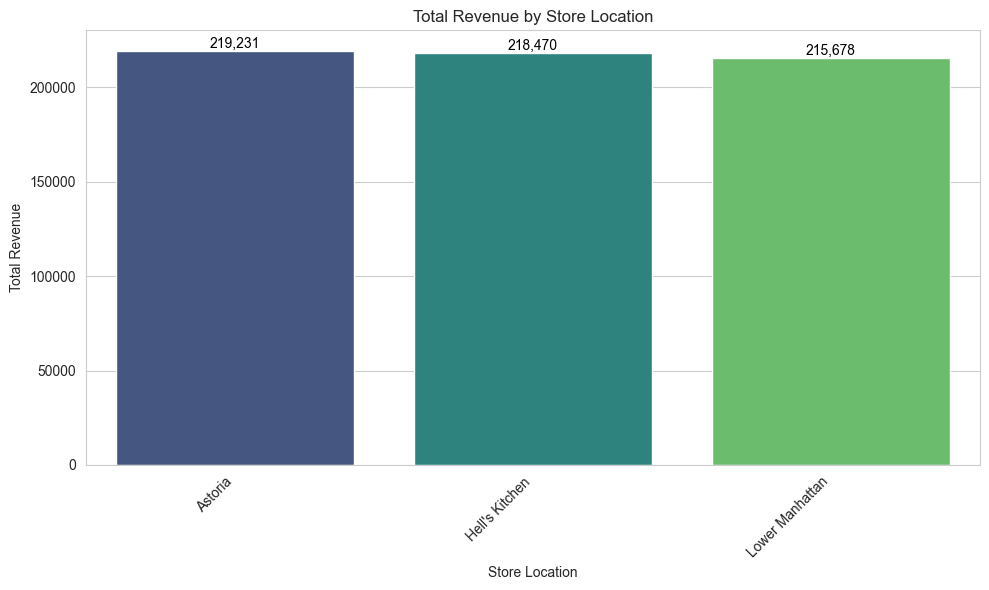

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create Aggregated DataFrames ---
store_performance = df1.groupby('store_location').agg(
    total_revenue=('revenue', 'sum')
).reset_index()

product_category_performance = df1.groupby('product_category').agg(
    total_revenue=('revenue', 'sum')
).reset_index()

product_type_performance = df1.groupby('product_type').agg(
    total_revenue=('revenue', 'sum')
).reset_index().sort_values(by='total_revenue', ascending=False)

# --- Visualize Store Revenue with Values ---
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=store_performance, x='store_location', y='total_revenue', palette='viridis')
plt.title('Total Revenue by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Add numbers on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, color='black')
plt.show()


/var/folders/7m/tj628p4932dbkrpjt4zx56wc0000gn/T/ipykernel_65540/3777059044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


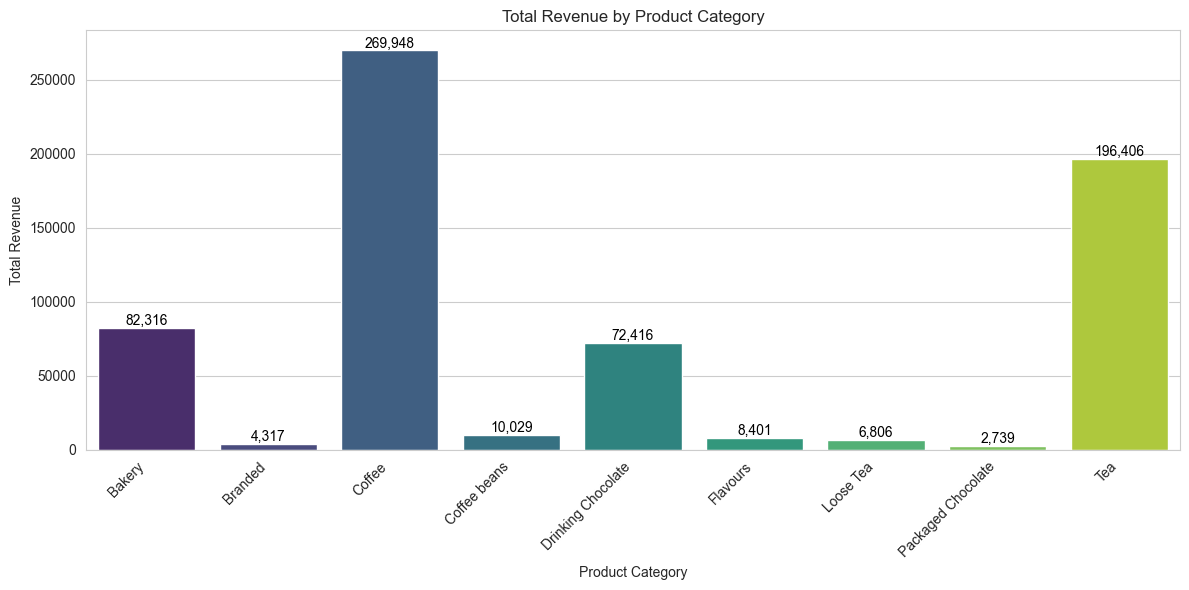

In [16]:
df_sorted = product_category_performance.sort_values('total_revenue', ascending=False)

# Create the bar plot with sorted data
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_sorted,
    x='product_category',
    y='total_revenue',
    palette='viridis'
)

# Set title and labels
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value annotations on top of the bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/var/folders/7m/tj628p4932dbkrpjt4zx56wc0000gn/T/ipykernel_65540/104284811.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


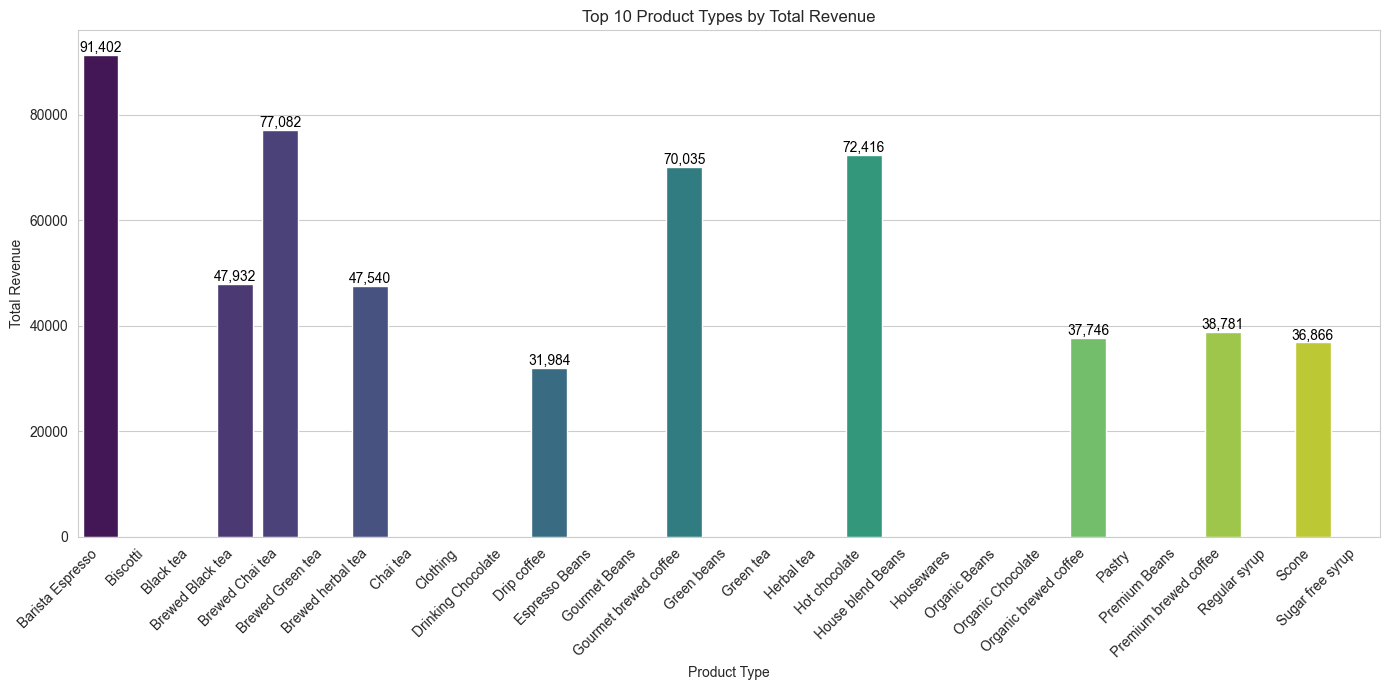

In [17]:

# --- Visualize Top Product Type Revenue with Values ---
top_n = 10
product_type_performance_top_n = product_type_performance.head(top_n)

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=product_type_performance_top_n,
    x='product_type', y='total_revenue', palette='viridis'
)
plt.title(f'Top {top_n} Product Types by Total Revenue')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=10, color='black')
plt.show()

# Location-Based Marketing Strategy

## Overall Strategy
Based on revenue analysis, implement a focused approach for each location while maintaining high performance standards across all stores.

### General Strategies (All Locations)
- **Local SEO & Digital Presence**
  - Optimized Google Business profiles 
  - Active social media engagement
  - Location-specific content
- **Customer Loyalty Program**  
  - Multi-location rewards system
  - Mobile app integration
  - Personalized offers
- **Community Building**
  - Local event participation  
  - Neighborhood partnerships
  - Community space initiatives

### Location-Specific Tactics

#### Astoria (Top Performer)
- **Capitalize on Success**
  - Customer feedback analysis
  - Popular product focus
  - Local business partnerships
- **Community Focus**
  - Host neighborhood events
  - Cross-promote with area shops
  - Local influencer engagement

#### Hell's Kitchen 
- **Urban Professional Focus**
  - Quick service options
  - Mobile pre-ordering
  - Corporate accounts/catering
- **Entertainment District Appeal**
  - Extended evening hours
  - Post-show promotions
  - Theater district specials

#### Lower Manhattan
- **Business District Strategy**
  - Morning rush promotions
  - Office worker specials 
  - Corporate delivery options
- **Tourist Appeal**
  - Enhanced visibility
  - Multilingual menus
  - Tourist-friendly offerings
- **Traffic Drivers**
  - Happy hour deals
  - Sampling programs
  - Local partnerships


# Product and Revenue Strategies

## Top Product Promotion Strategies

### Feature Premium Products
- Highlight Barista Espresso, Chai Tea, and Hot Chocolate prominently
- Create seasonal variations (Pumpkin Chai, Peppermint Hot Chocolate)
- Train staff on upselling add-ons (extra shots, syrups, toppings)

### Optimize Coffee Program
- Implement Coffee of the Day rotation with tasting notes
- Add educational materials about coffee varieties and brewing methods
- Competitive pricing and refills for Drip Coffee
- Highlight premium/organic coffee origins and certifications

### Bundling & Cross-Promotion
- Bundle top beverages with pastries (Espresso + Scone deal)
- Create afternoon beverage + snack promotions
- Suggest specific food pairings for each coffee type

### Loyalty & Digital Marketing
- Launch beverage-specific loyalty rewards
- Share drink photos and videos on social media
- Run customer polls and photo contests
- Optimize online ordering visibility of top products
- Target ads to specialty coffee/tea audiences

### Location-Based Strategy
- Customize promotions based on store performance
- Focus premium products in high-revenue locations
- Adapt menu mix to local preferences


# Strategies Based on Revenue Trends

## 1. Seasonal Campaign Planning
- Execute strong marketing campaigns in Q2 (April-June) during peak demand period
- Launch new menu items and promotional offers before April to capitalize on rising demand curve

## 2. Subscription Program Strategy
- Implement monthly coffee subscription plans with special discounts, particularly for Q2
- Create early subscription incentives for customers who sign up before April

## 3. Inventory Management
- Utilize demand forecasting to optimize stock levels of high-demand items
- Minimize waste while ensuring adequate inventory during peak revenue periods

## 4. Off-Peak Testing
- Take advantage of lower demand in January-February to test and refine:
  - New marketing campaigns
  - Promotional offers
  - Menu items
  - Pricing strategies
